# LeNet 1 Modified

Purpose of writing the LeNet 1 Model is to establish a baseline for the rest of our classifiers/convolutional network models. The LeNet 1 model was originally developed for the purpose of classifying the original MNIST data set or 0 - 9 hand written digits. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split

## Load the Data

In [2]:
# Get the data from the csv file
data = pd.read_csv("./data/handwritten_data_785.csv", encoding = "utf8").values
np.random.shuffle(data)

# Split the data into X, Y, and parition the values into the training and test splits
# Reshape X to be in the shape (N, 28, 28)
X, Y = data[:,1:], data[:,0]
# X = X.reshape(X.shape[0], 28, 28)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Train {} {}".format(X_train.shape, Y_train.shape))
print("Test {} {}".format(X_test.shape, Y_test.shape))

Train (297629, 784) (297629,)
Test (74408, 784) (74408,)


## Analyze the Data

In [3]:
classes = np.unique(Y_train)
n_classes = len(classes)
print('Total number of outputs : ', n_classes)
print('Output classes : ', classes)

Total number of outputs :  26
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


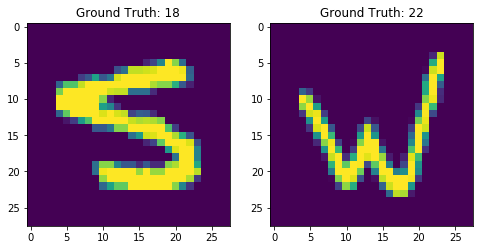

In [4]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(Y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(Y_test[0]))

plt.show()


## Data Preprocessing

In [6]:
from keras.utils import to_categorical

/Users/winston/uci/year3/spring18/cs175/final_project/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print("Train {}".format(X_train.shape))
print("Test {}".format(X_test.shape))

Train (297629, 28, 28, 1)
Test (74408, 28, 28, 1)


In [8]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Normalize and standardize the data
mean_image = np.mean(X_train, axis=0)
X_train = (X_train - mean_image) / 255
X_test = (X_test - mean_image) / 255

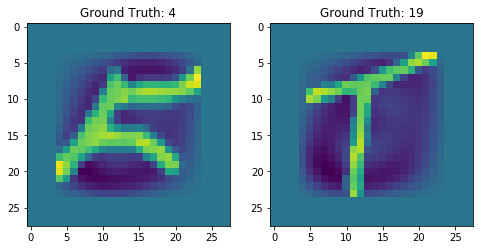

In [8]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(Y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(Y_test[0]))

plt.show()

In [9]:
Y_train_onehot = to_categorical(Y_train)
Y_test_onehot = to_categorical(Y_test)

print("Original Label: {}".format(Y_train[0]))
print("One Hot Label: {}".format(Y_train_onehot[0]))

Original Label: 4
One Hot Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [10]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train_onehot, test_size=0.2)

print("Train: {} {}".format(X_train.shape, Y_train.shape))
print("Valid: {} {}".format(X_valid.shape, Y_valid.shape))

Train: (238103, 28, 28, 1) (238103, 26)
Valid: (59526, 28, 28, 1) (59526, 26)


## Le Net 1 Model

In [13]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [14]:
batch_size = 128
epochs = 10
num_classes = 26

### Input
The LeNet 1 model accepts a 28 x 28 input layer.

### Architecture
Conolutional Layer 1: Output should be 24 x 24 x 4

Activation: Your choice of activation function

Pooling Layer 1: Output should be 12 x 12 x 4

Convolution Layer 2: Output should be 8 x 8 x 12

Activation: Your choice of activation function

Pooling Layer 2: Output should be 4 x 4 x 12

Conolution Layer 3: Output should be 1 x 1 x 10

In [15]:
lenet1_mod_model = Sequential()
# Convolutional Layer 1
lenet1_mod_model.add(Conv2D(32, 
                            kernel_size=(5,5), 
                            padding="same", 
                            activation="relu",
                            input_shape=(28, 28, 1), 
                            data_format="channels_last"))

# Pooling Layer 1
lenet1_mod_model.add(MaxPooling2D(pool_size=(2,2), 
                                  padding="same"))

# Convolution Layer 2
lenet1_mod_model.add(Conv2D(32, 
                            kernel_size=(5,5), 
                            activation="relu", 
                            padding="same"))

# Pooling Layer 2
lenet1_mod_model.add(MaxPooling2D(pool_size=(2,2), 
                                  padding="same"))

# Convolution Layer 3
lenet1_mod_model.add(Conv2D(32, 
                            kernel_size=(5,5), 
                            activation="linear", 
                            padding="same"))

lenet1_mod_model.add(Flatten())

lenet1_mod_model.add(Dense(128, 
                           activation="relu"))

lenet1_mod_model.add(Dense(num_classes, 
                           activation="softmax"))


In [17]:
lenet1_mod_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [19]:
lenet1_mod_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
__________

In [21]:
lenet1_mod_train = lenet1_mod_model.fit(X_train, Y_train, batch_size=batch_size,
                                epochs=epochs,verbose=1,validation_data=(X_valid, Y_valid))

Train on 238103 samples, validate on 59526 samples
Epoch 1/10
238080/238103 [============================>.] - ETA: 0s - loss: 0.1766 - acc: 0.9521

KeyboardInterrupt: 

In [91]:
test_eval = lenet1_mod_model.evaluate(X_test, Y_test_onehot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 10.675573777388584
Test accuracy: 0.15764433931835287


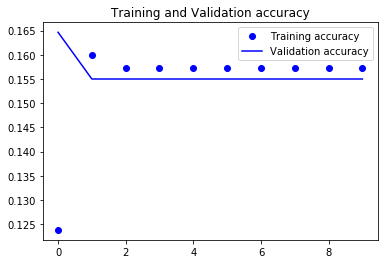

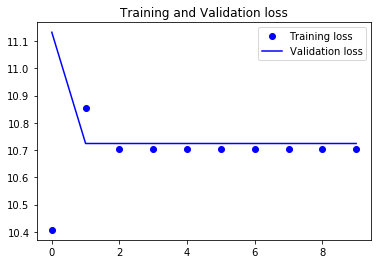

In [92]:
accuracy = lenet1_train.history['acc']
val_accuracy = lenet1_train.history['val_acc']
loss = lenet1_train.history['loss']
val_loss = lenet1_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()